# Trending Youtube Analysis Project

- Group member: Jieming Bian, Yongyi(Nikki) Zhao


#### data sources <br/>
https://www.kaggle.com/datasnaek/youtube-new#USvideos.csv

In [ ]:
# install all the packages we need: 
#!pip install translate

In [1]:
#import module needed

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from translate import Translator
import requests 
from bs4 import BeautifulSoup 
import wordcloud
import datetime
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from collections import OrderedDict
import pprint
import json 
import re


In [2]:
# read csv file 
df_us = pd.read_csv('USvideos.csv')

**Data Cleaning**


In [3]:
#start cleanning data 

In [4]:
#start cleanning data 
#Short summary of cleaning data
#Step 1: Use heatmap to check if there are some missing data
#Step 2: Transform the trending data and publish time into datetime, then divide the publish time into year-month-day and hour-min-second.
#Step 3: Add column "category_name" which is associated with each "category_id".
#Step 4: Use the column 'video_error_or_removed' to test if there are data not exists. If there is, then remove it.

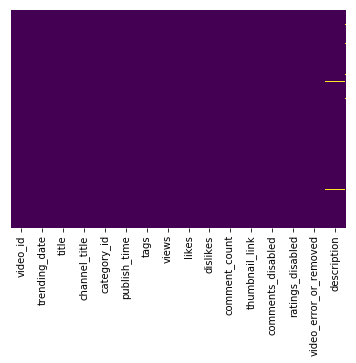

In [5]:
#use heatmap to check if our data has any missing data, and looks like there's missing data in descripting column
sns.heatmap(df_us.isnull(), yticklabels=False, cbar=False, cmap='viridis') 
plt.show() 


In [6]:
#fill nan value with empty string 
df_us["description"] = df_us["description"].fillna(value="")

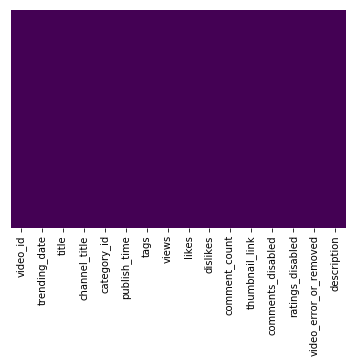

In [7]:
# check again if there's any missing data
sns.heatmap(df_us.isnull(), yticklabels=False, cbar=False, cmap='viridis') 
plt.show() 

In [8]:
#change to type datetime64 
df_us['trending_date'] = df_us['trending_date'].apply(lambda x:datetime.datetime.strptime(x,'%y.%d.%m'))

In [9]:
df_us['publish_time'] = df_us['publish_time'].apply(lambda x:datetime.datetime.strptime(x,"%Y-%m-%dT%H:%M:%S.%fZ"))

In [10]:
#split the pulish_data with publish_date and time 

df_us.insert(5, 'publish_date', df_us['publish_time'].dt.date)
df_us['publish_time'] = df_us['publish_time'].dt.time
df_us.head()

,video_id,trending_date,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [11]:
#pair catergory id with catergory names 
cid = sorted(df_us['category_id'].unique())
cname = ['Film & Animation', 'Autos & Vehicles', 'Music', 'Pets & Animals', 'Sports', 'Travel & Events', 'Gaming', 'People & Blogs', 'Comedy', 'Entertainment', 'News & Politics', 'How-to & Style', 'Education', 'Science & Technology', 'Non-profits & Activism', 'Shows' ]
c_dict = {cid[i]:cname[i] for i in range(len(cid))} 
c_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 19: 'Travel & Events',
 20: 'Gaming',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'How-to & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Non-profits & Activism',
 43: 'Shows'}

In [12]:
# add category name variable in to data frame 
data = pd.Series(c_dict[i] for i in df_us['category_id']) 

In [13]:
# insert data
df_us.insert(5, 'category_name',data)

In [14]:
# remove the videos that does not exist any more 
df_us_exist = df_us[df_us['video_error_or_removed'] == False] 

In [15]:
df_us_exist.head() 

,video_id,trending_date,title,channel_title,category_id,category_name,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,2017-11-13,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,2017-11-13,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,2017-11-13,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [16]:
df_us_exist.columns 

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'category_name', 'publish_date', 'publish_time', 'tags', 'views',
       'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description'],
      dtype='object')

In [17]:
#done with data cleanning 

**Correlation between views,likes,likes,dislike**

In [18]:
data_us = df_us_exist[['views','likes','dislikes','comment_count']]
corr_us = data_us.corr()
corr_us  

,views,likes,dislikes,comment_count
views,1.000000,0.849167,0.472219,0.617627
likes,0.849167,1.000000,0.447192,0.803070
dislikes,0.472219,0.447192,1.000000,0.700183
comment_count,0.617627,0.803070,0.700183,1.000000


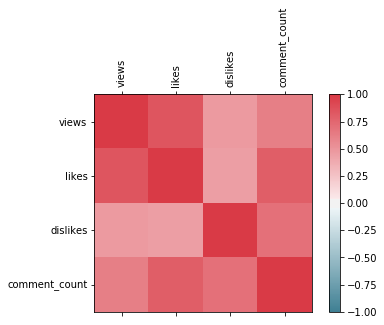

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_us,cmap=sns.diverging_palette(220, 10, as_cmap=True), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data_us.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data_us.columns)
ax.set_yticklabels(data_us.columns)
plt.show()

In [20]:
Category_name = []
cv_dict = {}
for i in df_us_exist['category_name'].unique():
      Category_name.append(i)
for i in Category_name:
    cv = np.array(df_us_exist.groupby('category_name').get_group(i)['views'])   
    cv_list = [j for j in cv]
    cv_dict[i] = pd.Series(np.array(cv_list))
cv_map_data = pd.DataFrame(cv_dict)
cv_map_data

,People & Blogs,Entertainment,Comedy,Science & Technology,Film & Animation,News & Politics,Sports,Music,Pets & Animals,Education,How-to & Style,Autos & Vehicles,Travel & Events,Gaming,Non-profits & Activism,Shows
0,748374.0,2418783,3191434.0,119180.0,826059.0,256426.0,81377.0,687582.0,207532.0,78044.0,145921.0,98378.0,141148.0,154872.0,1456.0,110112.0
1,98966.0,343168,295639.0,817732.0,50867.0,544770.0,945.0,17158531.0,45455.0,223871.0,120727.0,7265.0,311621.0,161231.0,1873.0,134433.0
2,321053.0,2095731,33980.0,75752.0,288922.0,27943.0,956169.0,13917.0,284666.0,115791.0,1456472.0,4850.0,571588.0,224426.0,2005.0,146353.0
3,197062.0,2103417,605932.0,97007.0,52591.0,34785.0,4569.0,57169.0,426078.0,144418.0,7224515.0,704363.0,1037561.0,463992.0,2093.0,153469.0
4,2744430.0,104578,3358068.0,224019.0,1751064.0,6473.0,1044813.0,60506.0,46571.0,67429.0,484185.0,341074.0,403564.0,55460.0,1967.0,161347.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951,NaN,2003345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9952,NaN,1437051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9953,NaN,8607264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9954,NaN,5564576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


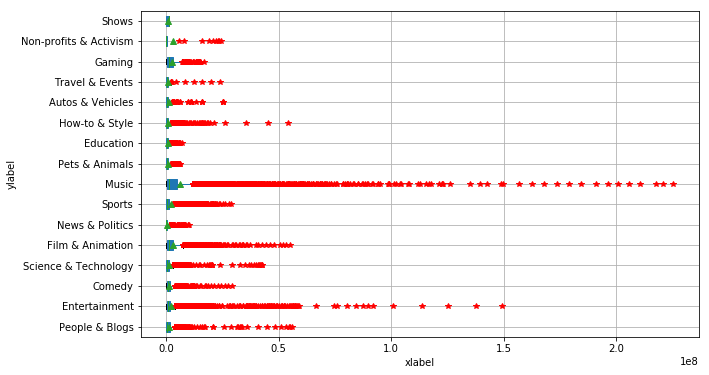

In [21]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
plt.figure(figsize=(10,6))  
cv_map_data.boxplot(sym='r*',vert=False,patch_artist=True,meanline=False,showmeans=True)
plt.ylabel("ylabel") 
plt.xlabel("xlabel") 
plt.show()
# There are so many outliers in each categories. Only shows have a little outliews. Other kinds of categories are not normal distbution. Since most outliers is beyond maximum. We cam say that it is right skewed.

**Figure out popular word from each catergory through wordcloud**

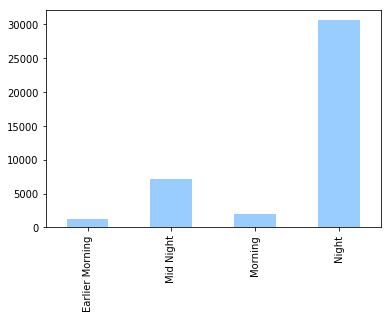

In [22]:
# see what time during a day they are posting their video, their posting habits 
def publish(df, ind, col):
    if datetime.time(0, 0, 0) <= df[col].loc[ind] < datetime.time(6, 0, 0):
        return 'Mid Night'
    elif datetime.time(6, 0, 0) <= df[col].loc[ind] < datetime.time(8, 0, 0):
        return 'Earlier Morning'
    elif datetime.time(8, 0, 0) <= df[col].loc[ind] < datetime.time(11, 0, 0):
        return 'Morning'
    elif datetime.time(11, 0, 0) <= df[col].loc[ind] < datetime.time(2, 0, 0):
        return 'Noon'
    elif datetime.time(2, 0, 0) <= df[col].loc[ind] < datetime.time(6, 0, 0):
        return 'Afternoon' 
    else:
        return 'Night' 


grouped = df_us_exist.groupby(lambda x: publish(df_us_exist,x,'publish_time')) 
grouped.size().plot(kind='bar', color='#99CCFF')
plt.show() 


In [23]:
#most popular catergories are music entertainment film comedy 

Top_Category = df_us_exist.groupby(['category_name'])[['views']].sum().sort_values(['views'],ascending=False)
Top_Category 

,views
category_name,
Music,40132892190
Entertainment,20597267426
Film & Animation,7253169649
Comedy,5117426208
People & Blogs,4917191726
Sports,4404451442
How-to & Style,4078545064
Science & Technology,3487756816
Gaming,2141218625


In [24]:
#number of times appear on trending list 
timesonlist = df_us_exist.groupby(['video_id']).size()

In [25]:
#top 10 popular viedeos 
#Childish Gambino - This Is America (Official V
#Ariana Grande - No Tears Left To Cry 
#BTS (방탄소년단) 'FAKE LOVE' Official MV (KPOP music)
#Becky G, Natti Natasha - Sin Pijama (Official Video) 
#VENOM - Official Trailer (HD)
#...
Top10_videos = df_us_exist.groupby(['title'])[['views']].sum().sort_values(['views'],ascending=False)[0:10]
Top10_videos

,views
title,
Childish Gambino - This Is America (Official Video),3758488765
Ariana Grande - No Tears Left To Cry,1529291326
BTS (방탄소년단) 'FAKE LOVE' Official MV,1283188291
"Becky G, Natti Natasha - Sin Pijama (Official Video)",1182971286
VENOM - Official Trailer (HD),1003151226
"Cardi B, Bad Bunny & J Balvin - I Like It [Official Music Video]",896558471
Selena Gomez - Back To You (Lyric Video),818792483
Maluma - Marinero (Official Video),803455479
"Calvin Harris, Dua Lipa - One Kiss (Official Video)",792843004


In [26]:
df_us_exist['publish_date'] = pd.to_datetime(df_us_exist['publish_date'])  
# df_us_exist.info()   

/Users/yongyizhao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df_us_exist['timestoontrend'] = (df_us_exist['trending_date']- df_us_exist['publish_date'])
df_us_exist['timestoontrend'].astype(int)

/Users/yongyizhao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0          86400000000000
1          86400000000000
2         172800000000000
3          86400000000000
4         172800000000000
               ...       
40944    2332800000000000
40945    2332800000000000
40946    2332800000000000
40947    2419200000000000
40948    2419200000000000
Name: timestoontrend, Length: 40926, dtype: int64

In [28]:
df_us_exist

,video_id,trending_date,title,channel_title,category_id,category_name,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,timestoontrend
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,2017-11-13,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,1 days
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,2017-11-13,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",1 days
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2 days
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,2017-11-13,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,1 days
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,Pets & Animals,2018-05-18,13:00:04,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,27 days
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,People & Blogs,2018-05-18,01:00:06,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,,27 days
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,Entertainment,2018-05-18,17:34:22,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,27 days
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,Film & Animation,2018-05-17,17:00:04,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,28 days


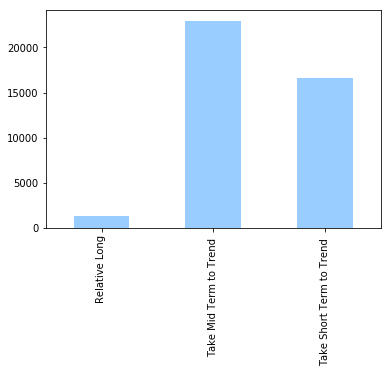

In [29]:
def trendgap(df, ind, col):
    if df[col].loc[ind].days < 5: 
        return 'Take Short Term to Trend '
    elif 5 <= df[col].loc[ind].days < 20:
        return 'Take Mid Term to Trend '
    else:
        return 'Relative Long'
        

grouped2 = df_us_exist.groupby(lambda x: trendgap(df_us_exist,x,'timestoontrend')) 
grouped2.size().plot(kind='bar', color='#99CCFF')
plt.show() 

Creating world cloud for each catergories 

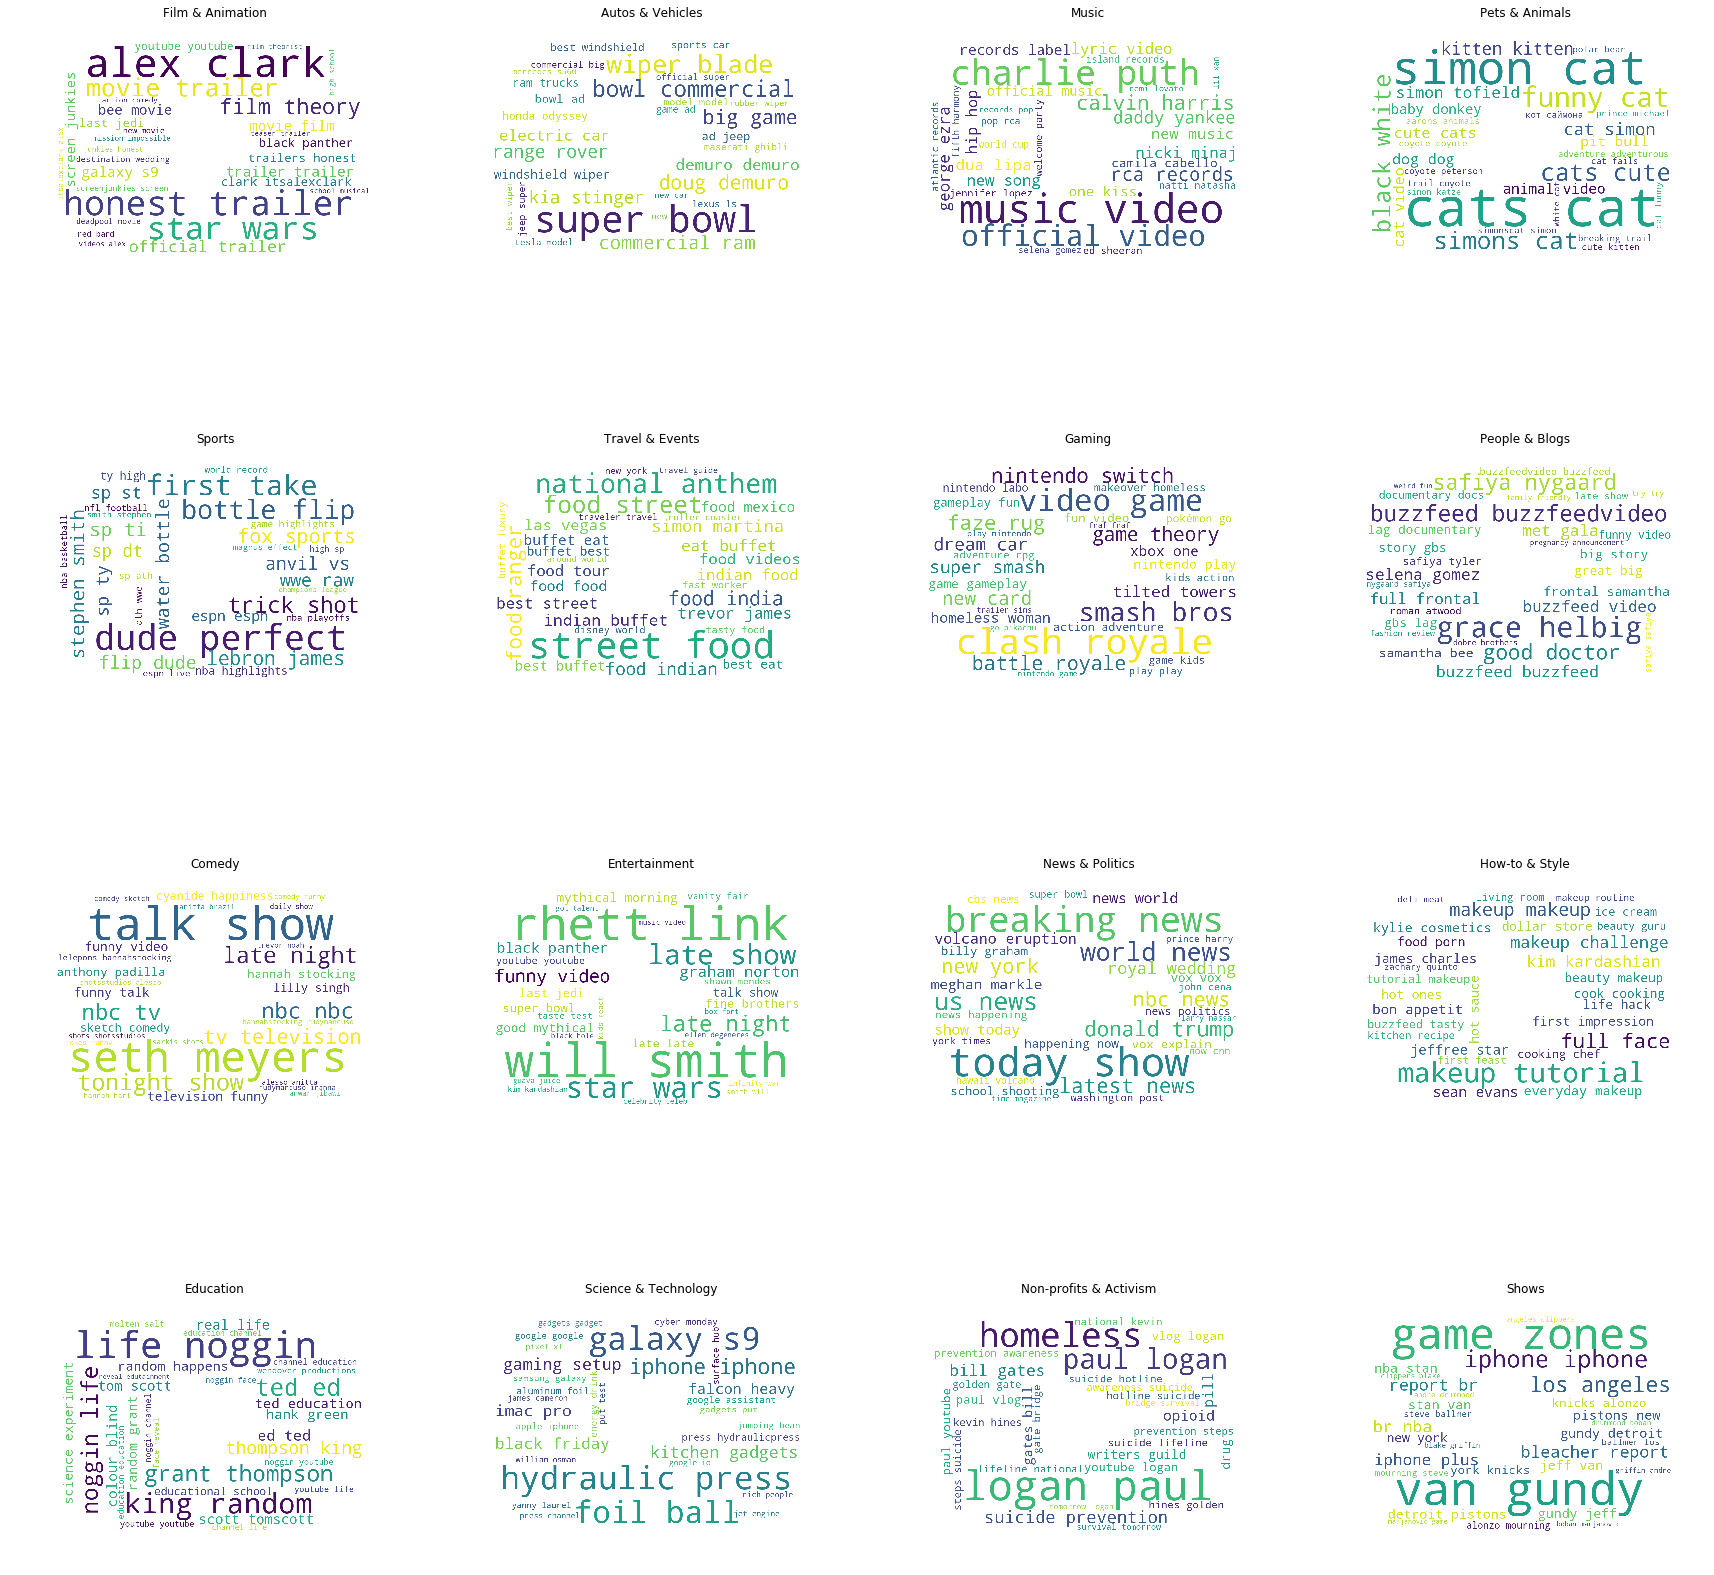

In [30]:
#plot word cloud for each catergories 

tags = []
from translate import Translator
translator= Translator(to_lang="en")
for i in cid:
    tag_array = np.array(df_us_exist.groupby('category_id').get_group(i)["tags"])
    tag_list = [j for j in tag_array]
    tag_str = ' '.join(tag_list)
    tag_str = tag_str.strip().split('|')
    tag_str = ' '.join(tag_str)
    tag_str =' '.join(tag_str.split('"'))
    trans_str = translator.translate(tag_str).lower()
    tags.append((c_dict[i],trans_str)) #get list of tags for each category_id
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
COL_NUM = 4
ROW_NUM = 4
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(30,30))

for i in range(0,len(tags)):
    ax = axes[i//4, i%4] 
    ax.set_title(tags[i][0])
    mask = np.array(Image.open("youtube2.png")) 
    wordcloud = WordCloud(mask=mask, stopwords=STOPWORDS,mode='RGBA', background_color='white',width=1200,height=1000,max_words=30).generate(tags[i][1])
    ax.imshow(wordcloud)
    ax.axis('off')
plt.show()

**Machine Learning**


In [31]:
#Add two new columns 'trending_times' and 'popular'. 'trending_times' counts the trend days of each videos and popular is a binomal variable
#If the trend days is great or equal than 10 days, we say the video is popular which the value of popular is 1.
trending_times = df_us_exist.groupby('video_id').size()
trending_dict = trending_times.to_dict()
trending_dict
trend_pd = pd.Series(trending_dict)
trend_pd = trend_pd.reset_index(level=None, drop=False, name=None, inplace=False)
trend_pd.columns = ['video_id', 'trending_times']
df_us_exist = pd.merge(df_us_exist, trend_pd, on = 'video_id')

In [32]:
df_us_exist['popular'] = np.where(df_us_exist['trending_times']<= 10, 0,1)

In [33]:
from nltk import word_tokenize
from sklearn.model_selection import train_test_split
df_us_exist['len_of_tags'] = 0
for i in range(len(df_us_exist.index)):
      df_us_exist['len_of_tags'].iloc[i] = len(df_us_exist['tags'].iloc[i])
    


/Users/yongyizhao/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [34]:
df_us_exist.groupby('popular').size()

popular
0    25437
1    15489
dtype: int64

In [35]:
#gives numerical id to each channel 
from sklearn.preprocessing import LabelEncoder 
for i in df_us_exist['channel_title']:
    if df_us_exist['channel_title'].dtype == type(object):
        le = LabelEncoder()
        df_us_exist['channel_title'] = le.fit_transform(df_us_exist['channel_title'])

In [36]:
# Random forest classfiction if a vedio has been trending for mult times or not.
X=df_us_exist[['channel_title', 'category_id','len_of_tags', 'views', 'likes', 'dislikes', 'comment_count']]  # Features
y=df_us_exist['popular']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [37]:
#The method of random forest classfiction
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf=RandomForestClassifier(n_estimators=30,max_depth=3)
clf.fit(X_train,y_train)
print("Accuracy for train:",metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Accuracy for test:",metrics.accuracy_score(y_test,clf.predict(X_test)))

Accuracy for train: 0.6857023177883272
Accuracy for test: 0.6746212738230982


Text(0.5, 0, 'Relative Importance')

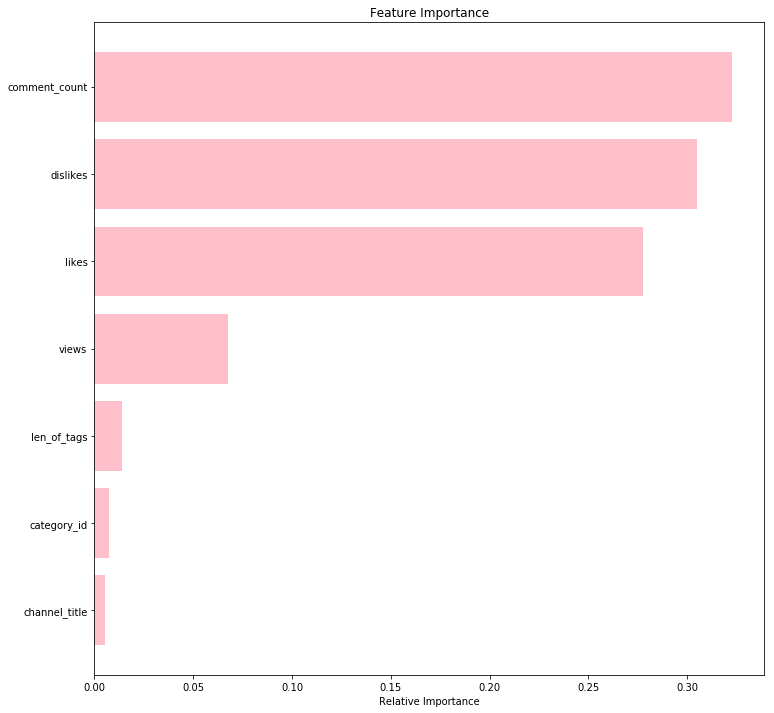

In [38]:
#Make the relative importances graph to reflect if each independent variables(features) is important or not
import matplotlib.pyplot as plt
%matplotlib inline
feature_names = X.columns
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)),feature_names)
plt.xlabel('Relative Importance')


In [39]:
#Classification by linear_model. Same train and test data. Only change the method to linear_classfication which greater than 0.5 is 1 and less than 0.5 is 0.
from sklearn import linear_model
lin=linear_model.LinearRegression()
lin.fit(X_train,y_train)
y_predict1=lin.predict(X_test)
def get_classification(predictions,threshold):
    classes = np.zeros_like(y_predict1)
    for i in range(len(classes)):
        if predictions[i] > threshold:
            classes[i] = 1
    return classes
get_classification(y_predict1,0.5)# threshold is 0.5
print("Accuracy for test:",metrics.accuracy_score(y_test,get_classification(y_predict1,0.5)))

Accuracy for test: 0.6358527447467014


In [40]:
#Classification by Logistic regression
from sklearn.linear_model import LogisticRegression
log=linear_model.LogisticRegression()
log.fit(X_train,y_train)
y_predict2=log.predict(X_test)
print("Accuracy for test:",metrics.accuracy_score(y_test,y_predict2))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict2) 

Accuracy for test: 0.6426942498778303


/Users/yongyizhao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[6886,  679],
       [3708, 1005]])

In [41]:
#Use random forest and extra tree to get predict trending_times. For this part, we do not to test if the video is popular or not. Instead, we tried to predict the trending days of video.
#Two methods are used. One is Random forest regreesion, another is extratreeregression. Need to show more about the difference and similarities of these two methods here.
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
X=df_us_exist[['channel_title', 'category_id','len_of_tags', 'views', 'likes', 'dislikes', 'comment_count']]  # Features
y=df_us_exist['trending_times']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_y_predict = rfr.predict(X_test)
etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)
etr_y_predict = etr.predict(X_test)
print('The predict y of Randomforest model: ', rfr_y_predict)
print("Randomforest model default score：", rfr.score(X_test, y_test))
print("Randomforest model R_squared：", r2_score(y_test, rfr_y_predict))
print('The predict y of ExtraTree model: ', etr_y_predict)
print("ExtraTree model default score：", etr.score(X_test, y_test))
print("ExtraTree model R_squared：", r2_score(y_test, etr_y_predict))

/Users/yongyizhao/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/yongyizhao/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The predict y of Randomforest model:  [ 6.3 11.4  5.5 ... 10.8 11.3  4.7]
Randomforest model default score： 0.814445893372481
Randomforest model R_squared： 0.814445893372481
The predict y of ExtraTree model:  [ 8.  11.   5.  ... 11.1  7.5  5.1]
ExtraTree model default score： 0.8483523265065636
ExtraTree model R_squared： 0.8483523265065636


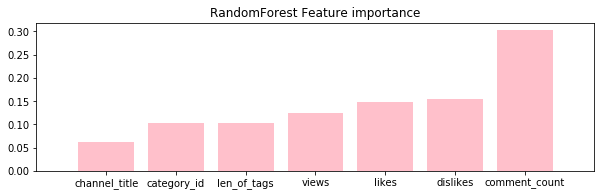

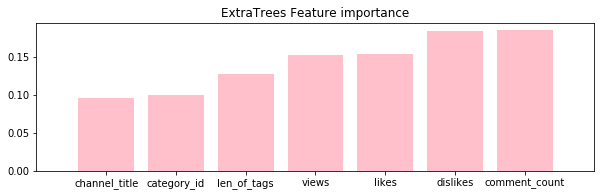

In [42]:
#Using the graph to show how importance of features in the two models.
import matplotlib.pyplot as plt
estimators = [("RandomForest", rfr),
              ("ExtraTrees", etr), ]
n_estimators = len(estimators)
for n, (name, estimator) in enumerate(estimators):
    feature_names = X.columns
    importances = estimator.feature_importances_
    indices = np.argsort(importances)
    plt.figure(figsize=(10,6))
    plt.subplot(n_estimators, 1, n+1)
    plt.title(name + " Feature importance")
    plt.bar(range(X.shape[1]), importances[indices],color="pink", align="center")
    plt.xticks(range(len(indices)),feature_names)
    plt.xlim([-1, X.shape[1]])
plt.show()

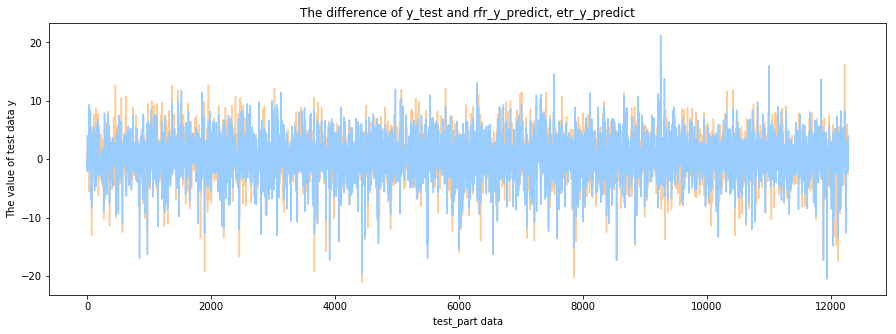

In [44]:
#Show in the difference of y_test and rfr_y_predict, etr_y_predict
plt.figure(figsize=(15,5))
plt.xlabel('test_part data')
plt.ylabel('The value of test data y')
plt.title('The difference of y_test and rfr_y_predict, etr_y_predict')
plt.plot(range(len(y_test)), rfr_y_predict-y_test, color='#FFCC99', label='The difference between y_test and rfr_y_predict')
plt.plot(range(len(y_test)), etr_y_predict-y_test, color='#99CCFF', label='The difference between y_test and etr_y_predict')


plt.show()

**Add More Features**

In [45]:
urllst = []
for i in df_us_exist['video_id']:
    urllst.append("https://www.youtube.com/watch?v="+i)
# urllst

In [ ]:
# don't run this, will takes more than three days !!!!
#web scraping the number of subscriptions, number of views up to now from each video link 


import urllib.request
import urllib.parse
import urllib.error
from bs4 import BeautifulSoup
import ssl
import json
import ast
import json
import os
from urllib.request import Request, urlopen

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
video_lst = []

# Input from user
for i in urllst:
    url = i
    

# Making the website believe that you are accessing it using a mozilla browser

    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urlopen(req).read()

    # Creating a BeautifulSoup object of the html page for easy extraction of data.

    soup = BeautifulSoup(webpage, 'html.parser')
    html = soup.prettify('utf-8')
    video_details = {}
    other_details = {}

#     for span in soup.findAll('span',attrs={'class': 'watch-title'}):
#         video_details['TITLE'] = span.text.strip()

    for script in soup.findAll('script',attrs={'type': 'application/ld+json'}):
            channelDesctiption = json.loads(script.text.strip())
            video_details['CHANNEL_NAME'] = channelDesctiption['itemListElement'][0]['item']['name']

    for div in soup.findAll('div',attrs={'class': 'watch-view-count'}):
        video_details['NUMBER_OF_VIEWS'] = div.text.strip()

    for span in soup.findAll('span',attrs={'class': 'yt-subscription-button-subscriber-count-branded-horizontal yt-subscriber-count'}):
        video_details['NUMBER_OF_SUBSCRIPTIONS'] = span.text.strip()

    hashtags = []
    for span in soup.findAll('span',attrs={'class': 'standalone-collection-badge-renderer-text'}):
        for a in span.findAll('a',attrs={'class': 'yt-uix-sessionlink'}):
            hashtags.append(a.text.strip())
    video_details['HASH_TAGS'] = len(hashtags)
    video_lst.append(video_details)
#save as json file 
with open('video_details.txt', 'w') as filehandle:
    json.dump(video_lst, filehandle)
    

In [46]:
# open file as json 
with open('video_details.txt', 'r') as filehandle: 
    videolst = json.load(filehandle) 

In [47]:
# videolst

In [48]:
len(videolst) 

40926

In [49]:
#get the indexes that do not have number of views  
index = []
chanel = []
numberview = []
suscript = []
for i in range(len(videolst)):
    if (videolst[i].get('NUMBER_OF_VIEWS') != None) and (videolst[i].get('NUMBER_OF_SUBSCRIPTIONS') != None):
        chanel.append( videolst[i].get('CHANNEL_NAME'))
        numberview.append(videolst[i].get('NUMBER_OF_VIEWS'))
        suscript.append(videolst[i].get('NUMBER_OF_SUBSCRIPTIONS'))
    else:
        index.append(i) 

In [50]:
len(index) 

2666

In [51]:
numberview = pd.Series(numberview)
suscript = pd.Series(suscript)

In [52]:
# list(numberview)

In [53]:
# drop rows that the chanel doesn't exists any more 
df_us_new = df_us_exist.drop(df_us_exist.index[index]) 
df_us_new = df_us_new.reset_index() 


In [54]:
df_us_new.corr() 

,index,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,trending_times,popular,len_of_tags
index,1.000000,-0.020805,-0.017058,0.159325,0.140227,0.037784,0.081506,-0.014004,-0.032371,NaN,0.634890,0.586801,0.099596
channel_title,-0.020805,1.000000,0.046155,-0.034161,-0.000807,-0.005082,0.027514,-0.038366,0.008303,NaN,-0.025252,-0.030853,0.025534
category_id,-0.017058,0.046155,1.000000,-0.170633,-0.177049,-0.037354,-0.078704,0.048972,-0.017318,NaN,-0.092655,-0.062976,0.141919
views,0.159325,-0.034161,-0.170633,1.000000,0.851508,0.463337,0.611586,0.001293,0.014727,NaN,0.250789,0.180433,-0.018538
likes,0.140227,-0.000807,-0.177049,0.851508,1.000000,0.446429,0.795587,-0.029027,-0.020570,NaN,0.215780,0.162482,-0.063252
dislikes,0.037784,-0.005082,-0.037354,0.463337,0.446429,1.000000,0.710922,-0.004610,-0.008414,NaN,0.079293,0.046734,-0.000743
comment_count,0.081506,0.027514,-0.078704,0.611586,0.795587,0.710922,1.000000,-0.028804,-0.013754,NaN,0.119019,0.090205,-0.024728
comments_disabled,-0.014004,-0.038366,0.048972,0.001293,-0.029027,-0.004610,-0.028804,1.000000,0.314983,NaN,-0.038400,-0.044866,-0.051182
ratings_disabled,-0.032371,0.008303,-0.017318,0.014727,-0.020570,-0.008414,-0.013754,0.314983,1.000000,NaN,-0.025871,-0.022179,-0.049952
video_error_or_removed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# add new variables into data frame 
df_us_new['views_uptotoday'] = numberview
df_us_new['Subscription (in Million)'] = suscript   

In [56]:
df_us_new = df_us_new.drop( columns='index') 

In [57]:
df_us_new 

,video_id,trending_date,title,channel_title,category_id,category_name,publish_date,publish_time,tags,views,...,comments_disabled,ratings_disabled,video_error_or_removed,description,timestoontrend,trending_times,popular,len_of_tags,views_uptotoday,Subscription (in Million)
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,335,22,People & Blogs,2017-11-13,17:13:01,SHANtell martin,748374,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,1 days,7,0,15,"2,948,787 views",11.6M
1,2kyS6SvSYSE,2017-11-15,WE WANT TO TALK ABOUT OUR MARRIAGE,335,22,People & Blogs,2017-11-13,17:13:01,SHANtell martin,2188590,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2 days,7,0,15,"15,599,710 views",7.38M
2,2kyS6SvSYSE,2017-11-16,WE WANT TO TALK ABOUT OUR MARRIAGE,335,22,People & Blogs,2017-11-13,17:13:01,SHANtell martin,2325233,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,3 days,7,0,15,"20,013,886 views",6.86M
3,2kyS6SvSYSE,2017-11-17,WE WANT TO TALK ABOUT OUR MARRIAGE,335,22,People & Blogs,2017-11-13,17:13:01,SHANtell martin,2400741,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,4 days,7,0,15,"1,363,558 views",15.9M
4,2kyS6SvSYSE,2017-11-18,WE WANT TO TALK ABOUT OUR MARRIAGE,335,22,People & Blogs,2017-11-13,17:13:01,SHANtell martin,2468267,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,5 days,7,0,15,"4,693,096 views",21.3M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38255,Gi56dSh8Fq8,2018-06-14,Gourmet Chef Makes A Big Mac Super Fancy,273,22,People & Blogs,2018-06-13,18:00:32,"mcdonalds|""big mac""|""fancy""|""fast food""|""jacqu...",402418,...,False,False,False,"It's your good ol' McDonald's Big Mac, but lik...",1 days,1,0,260,"20,442,274 views",2.49M
38256,dS5Thrl-4Kc,2018-06-14,CRAYOLA MAKEUP | HIT OR MISS?,1013,26,How-to & Style,2018-06-12,18:55:26,"Laura88Lee|""crayola""|""crayon makeup""|""crayola ...",607422,...,False,False,False,"Hey Larlees, todays video is me testing Crayol...",2 days,1,0,425,"6,191,629 views",2.37M
38257,JGm9Y_hFqNk,2018-06-14,First Take reacts: Kyrie Irving says contract ...,555,17,Sports,2018-06-13,15:06:08,"espn|""espn live""|""boston celtics""|""kyrie irvin...",812832,...,False,False,False,First Take's Stephen A. Smith and Max Kellerma...,1 days,1,0,504,"3,147,122 views",2.71M
38258,6h8QgZF5Qu4,2018-06-14,Drop the Mic w/ Ashton Kutcher & Sean Diddy Combs,1752,24,Entertainment,2018-06-13,05:27:27,"The Late Late Show|""Late Late Show""|""James Cor...",864189,...,False,False,False,James Corden and Ashton Kutcher square off in ...,1 days,1,0,331,"1,796,410 views",3.59M


In [58]:
pattern1 = re.compile(r'([\d.]+)')
pattern2 = re.compile(r'([\d,]+)')
# df_us_new['Subscription (in Million)'].str.extract(pat=pattern1)

df_us_new['views_uptotoday'] = df_us_new['views_uptotoday'].str.extract(pat=pattern2)                     

In [59]:
suscription = [] 
for i in df_us_new['Subscription (in Million)']:
    if i[-1] == 'M':
        suscription.append(float(i[:-1])*1000000)
    elif i[-1] == 'K':
        suscription.append(float(i[:-1])*1000)
    else:
        suscription.append(float(i)) 

In [60]:
suscription = pd.Series(suscription)  
df_us_new['Subscription (in Million)'] = suscription 

In [61]:
numviews = []
for i in df_us_new['views_uptotoday']:
    numviews.append(int(''.join(i.split(','))))

In [62]:
numviews = pd.Series(numviews) 
numviews 

0         2948787
1        15599710
2        20013886
3         1363558
4         4693096
           ...   
38255    20442274
38256     6191629
38257     3147122
38258     1796410
38259    11689762
Length: 38260, dtype: int64

In [63]:
df_us_new['views_uptotoday'] = numviews

In [64]:
df_us_new['views_uptotoday']

0         2948787
1        15599710
2        20013886
3         1363558
4         4693096
           ...   
38255    20442274
38256     6191629
38257     3147122
38258     1796410
38259    11689762
Name: views_uptotoday, Length: 38260, dtype: int64

In [65]:
df_us_new['percentageviews'] = (df_us_new['views_uptotoday']-df_us_new['views'])/(df_us_new['views']) 

In [66]:
#feature scaling 
df_us_new['views'] = df_us_new['views'] / df_us_new['views'].max()
df_us_new['likes'] = (df_us_new['likes'] - df_us_new['likes'].min()) / (df_us_new['likes'].max() - df_us_new['likes'].min())
df_us_new['dislikes'] = (df_us_new['dislikes'] - df_us_new['dislikes'].min()) / df_us_new['dislikes'].max()-df_us_new['dislikes'].max()
df_us_new['comment_count'] = (df_us_new['comment_count'] - df_us_new['comment_count'].min()) / df_us_new['comment_count'].std()


In [67]:
# i change views likes dislikes comment_count into same scaleing 

In [68]:
df_us_new['Subscription (in Million)']= df_us_new['Subscription (in Million)'].astype('float')


In [69]:
#As adding more variables as independent variable(feature), we can upgrade of models.
from nltk import word_tokenize
from sklearn.model_selection import train_test_split
# Random forest classfiction if a vedio is considered as popular or not.
X=df_us_new[['category_id','len_of_tags', 'views', 'likes', 'dislikes', 'comment_count', 'percentageviews','Subscription (in Million)']]  # Features
y=df_us_new['popular']  # Labels

# Split dataset into training set and test set. 30% of data are randomly in test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [70]:
# Random forest classfiction if a vedio has been trending for mult times or not.
X=df_us_new[['channel_title', 'category_id','len_of_tags', 'views', 'likes', 'dislikes', 'comment_count', 'percentageviews','Subscription (in Million)']]  # Features
y=df_us_new['popular']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [71]:
#The method of random forest classfiction
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf=RandomForestClassifier(n_estimators=30,max_depth=3)
clf.fit(X_train,y_train)
print("Accuracy for train:",metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Accuracy for test:",metrics.accuracy_score(y_test,clf.predict(X_test)))

Accuracy for train: 0.7012919124785304
Accuracy for test: 0.6905384213277574


In [72]:
from sklearn.model_selection import GridSearchCV
parameters = {
     'n_estimators':(10, 30),
     'max_depth':(4,5,6,8,10),
     'min_samples_split': (2, 4, 8),
     'min_samples_leaf': (4,8,12,16)
}

model = GridSearchCV(RandomForestClassifier(),parameters,cv=3,iid=False)
model.fit(X_train, np.ravel(y_train))
model.best_score_, model.best_params_

(0.7702935274553363,
 {'max_depth': 10,
  'min_samples_leaf': 4,
  'min_samples_split': 4,
  'n_estimators': 30})

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf=RandomForestClassifier(n_estimators=30,max_depth=10,min_samples_leaf=4,min_samples_split=8)
clf.fit(X_train,y_train)
print("Accuracy for train:",metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Accuracy for test:",metrics.accuracy_score(y_test,clf.predict(X_test))) 


Accuracy for train: 0.819318945560451
Accuracy for test: 0.7655514898065865


Text(0.5, 0, 'Relative Importance')

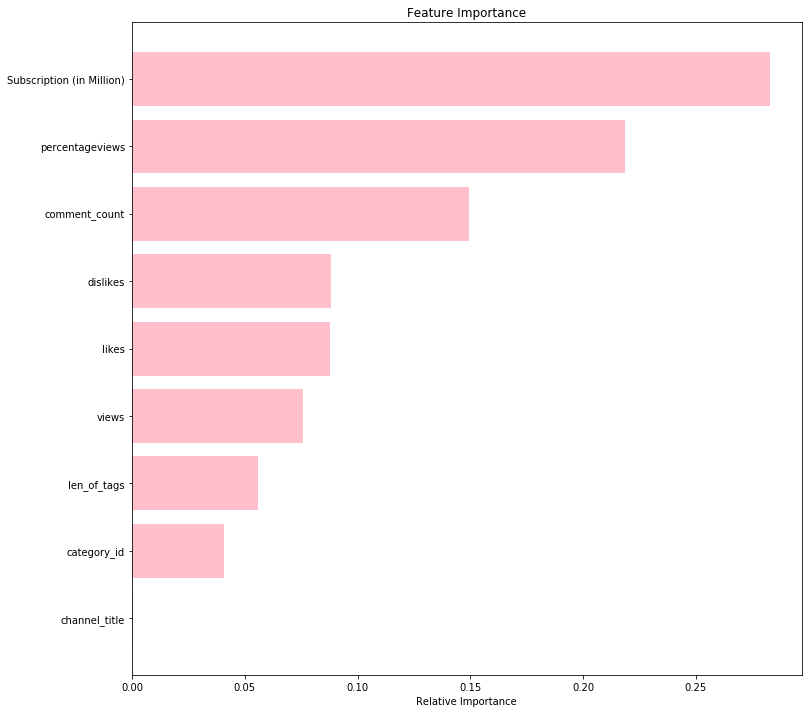

In [74]:
#Make the relative importances graph to reflect if each independent variables(features) is important or not
import matplotlib.pyplot as plt
%matplotlib inline
feature_names = X.columns
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)),feature_names)
plt.xlabel('Relative Importance')

In [75]:
#Classification by linear_model. Same train and test data. Only change the method to linear_classfication which greater than 0.5 is 1 and less than 0.5 is 0.
from sklearn import linear_model
lin=linear_model.LinearRegression()
lin.fit(X_train,y_train)
y_predict1=lin.predict(X_test)
def get_classification(predictions,threshold):
    classes = np.zeros_like(y_predict1)
    for i in range(len(classes)):
        if predictions[i] > threshold:
            classes[i] = 1
    return classes
get_classification(y_predict1,0.5)# threshold is 0.5
print("Accuracy for test:",metrics.accuracy_score(y_test,get_classification(y_predict1,0.5)))

Accuracy for test: 0.6428820351977697


In [76]:
#Classification by Logistic regression. Similar with above.
from sklearn.linear_model import LogisticRegression
log=linear_model.LogisticRegression()
log.fit(X_train,y_train)
y_predict2=log.predict(X_test)
print("Accuracy for test:",metrics.accuracy_score(y_test,y_predict2))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict2) 

Accuracy for test: 0.621885345879073


/Users/yongyizhao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[6985,  191],
       [4149,  153]])

In [77]:
#Use random forest and extra tree to get predict trending_times. For this part, we do not to test if the video is popular or not. Instead, we tried to predict the trending days of video.
#Two methods are used. One is Random forest regreesion, another is extratreeregression. Need to show more about the difference and similarities of these two methods here.
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
X=df_us_new[['channel_title', 'category_id','len_of_tags', 'views', 'likes', 'dislikes', 'comment_count','percentageviews','Subscription (in Million)']]  # Features
y=df_us_new['trending_times']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_y_predict = rfr.predict(X_test)
etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)
etr_y_predict = etr.predict(X_test)
print('The predict y of Randomforest model: ', rfr_y_predict)
print("Randomforest model default score：", rfr.score(X_test, y_test))
print("Randomforest model R_squared：", r2_score(y_test, rfr_y_predict))
print('The predict y of ExtraTree model: ', etr_y_predict)
print("ExtraTree model default score：", etr.score(X_test, y_test))
print("ExtraTree model R_squared：", r2_score(y_test, etr_y_predict))

/Users/yongyizhao/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/yongyizhao/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The predict y of Randomforest model:  [14.6 11.8  4.5 ... 13.   8.6 14.6]
Randomforest model default score： 0.7124906368369744
Randomforest model R_squared： 0.7124906368369743
The predict y of ExtraTree model:  [15.1  9.1  3.5 ... 13.   7.7 11.8]
ExtraTree model default score： 0.7996310916774103
ExtraTree model R_squared： 0.7996310916774103


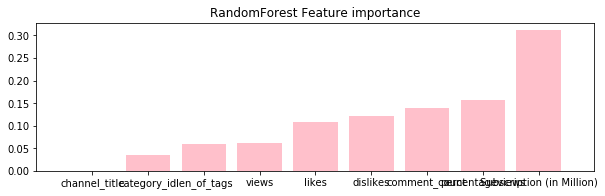

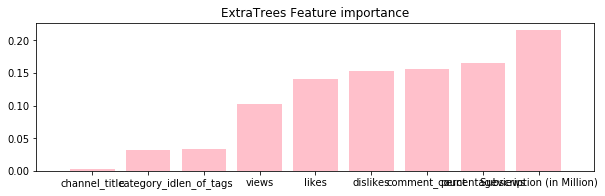

In [78]:
#Using the graph to show how importance of features in the two models. 
import matplotlib.pyplot as plt
estimators = [("RandomForest", rfr),
              ("ExtraTrees", etr), ]
n_estimators = len(estimators)
for n, (name, estimator) in enumerate(estimators):
    feature_names = X.columns
    importances = estimator.feature_importances_
    indices = np.argsort(importances)
    plt.figure(figsize=(10,6))
    plt.subplot(n_estimators, 1, n+1)
    plt.title(name + " Feature importance")
    plt.bar(range(X.shape[1]), importances[indices],color="pink", align="center")
    plt.xticks(range(len(indices)),feature_names)
    plt.xlim([-1, X.shape[1]])
plt.show()

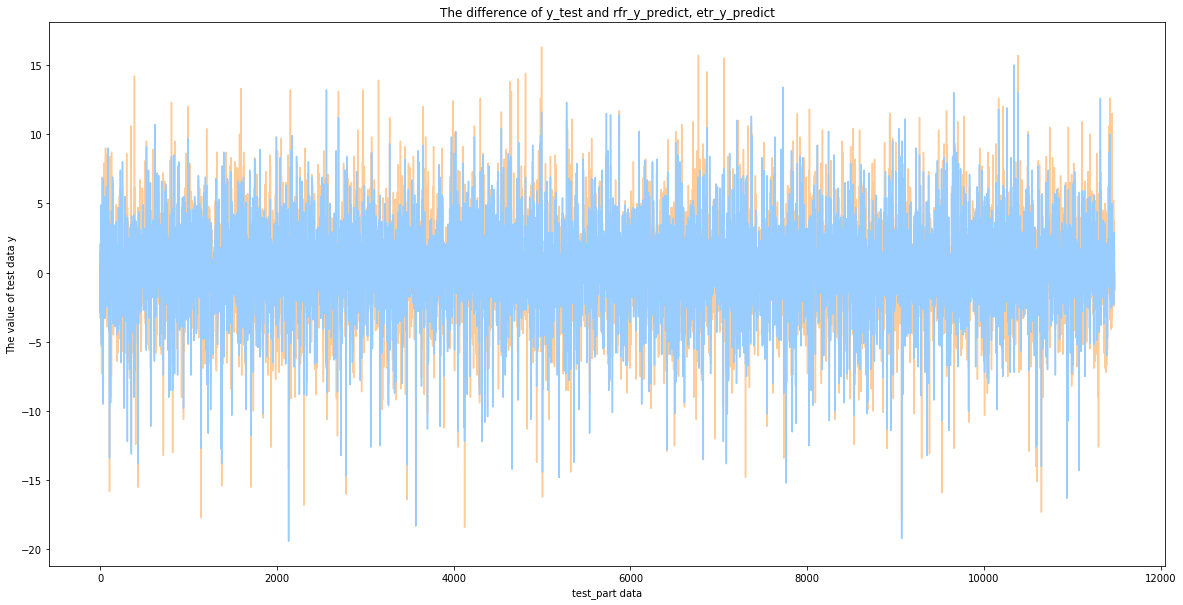

In [79]:
#Show in the difference of y_test and rfr_y_predict, etr_y_predict
plt.figure(figsize=(20,10))
plt.xlabel('test_part data')
plt.ylabel('The value of test data y')
plt.title('The difference of y_test and rfr_y_predict, etr_y_predict')
plt.plot(range(len(y_test)), rfr_y_predict-y_test, color='#FFCC99', label='The difference between y_test and rfr_y_predict')
plt.plot(range(len(y_test)), etr_y_predict-y_test, color='#99CCFF', label='The difference between y_test and etr_y_predict')


plt.show()

## Neural Network 

In [80]:
neuralsample = df_us_new[['dislikes','likes','percentageviews','Subscription (in Million)','popular']]
n = len(neuralsample)
bootsample = neuralsample.sample(n=int(n*0.5),replace=True)

In [81]:
bootsample[bootsample.columns[0:4]]

,dislikes,likes,percentageviews,Subscription (in Million)
22499,-1.674420e+06,0.005499,4.529814,3010000.0
21458,-1.674420e+06,0.002410,-0.310976,984000.0
33372,-1.674420e+06,0.005092,-0.612050,3130000.0
17498,-1.674420e+06,0.000729,5.347647,6090000.0
9892,-1.674420e+06,0.007474,-0.654541,2390000.0
...,...,...,...,...
22823,-1.674420e+06,0.002551,5.099493,4680000.0
10462,-1.674420e+06,0.000015,43.283178,10000000.0
5445,-1.674420e+06,0.000558,12.597305,910000.0
6835,-1.674420e+06,0.001577,25.266845,2360000.0


In [82]:
training_inputs = bootsample[bootsample.columns[0:4]]
training_outputs = bootsample[bootsample.columns[4]]


In [83]:
def logistic(x): # sigmoid 
    return 1/(1 + np.exp(-x))
 
def logistic_derivative(x): # sigmoid 
    return logistic(x)*(1-logistic(x))



class NeuralNetwork:
    def __init__(self, layers, activation='logistic'):
        """
        :param layers: A list containing the number of units in each layer.
        Should be at least two values

        """
        if activation == 'logistic':
            self.activation = logistic
            self.activation_deriv = logistic_derivative
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_deriv = tanh_deriv
 
        self.weights = []
        for i in range(1, len(layers) - 1): # add weights
            self.weights.append((2*np.random.random((layers[i - 1] + 1, layers[i] + 1))-1)*0.25)
            self.weights.append((2*np.random.random((layers[i] + 1, layers[i + 1]))-1)*0.25)
 
    def fit(self, X, y, learning_rate=0.02, epochs=10000):
        X = np.atleast_2d(X) 
        temp = np.ones([X.shape[0], X.shape[1]+1])
        temp[:, 0:-1] = X  # adding the bias unit to the input layer
        X = temp
        y = np.array(y)
 
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]
 
            for l in range(len(self.weights)):  #going forward network, for each layer
            #Computer the node value for each layer (O_i) using activation function
                test = np.dot(a[l], self.weights[l])
                a.append(self.activation(test))  
            error = y[i] - a[-1]  #Computer the error at the top layer
            #For output layer, Err calculation (delta is updated error)
            deltas = [error * self.activation_deriv(a[-1])]
 
            #Start backprobagation
            for l in range(len(a) - 2, 0, -1):
                #Compute the updated error (i,e, deltas) for each node going from top layer to input layer
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_deriv(a[l]))
                
            deltas.reverse()
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)
 
    def predict(self, x):
        x = np.array(x)
        temp = np.ones(x.shape[0]+1)
        temp[0:-1] = x
        a = temp
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a



In [84]:
n=len(bootsample)

In [85]:
nn = NeuralNetwork([4, 4, 1])   

In [86]:
nn.fit(training_inputs,training_outputs) 

In [87]:
data = neuralsample[neuralsample.columns[0:4]]
truey = neuralsample[neuralsample.columns[4]]

In [88]:
lst = []
for i in np.atleast_2d(data):
    lst.extend(list(nn.predict(i))) 
# lst 

In [89]:
pred = []
for i in lst:
    if i >= 0.5:
        pred.append(1)
    else:
        pred.append(0)

In [90]:
i = 0
for i in range(len(pred)):
    if truey[i] == pred[i]:
        i+=1
    else:
        continue
i/len(pred)      

0.9999738630423419